In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import sklearn
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model.coordinate_descent import ConvergenceWarning
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier

In [2]:

mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

warnings.filterwarnings(action = 'ignore', category=ConvergenceWarning)

In [3]:

path = "datas/crx.data"
names = ['A1','A2','A3','A4','A5','A6','A7','A8',
         'A9','A10','A11','A12','A13','A14','A15','A16']
df = pd.read_csv(path, header=None, names=names)
print ("数据条数:", len(df))

df = df.replace("?", np.nan).dropna(how='any')
print ("过滤后数据条数:", len(df))

df.head(5)

数据条数: 690
过滤后数据条数: 653


,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:


def parse(v, l):
    return [1 if i == v else 0 for i in l]
def parseRecord(record):
    result = []
    
    a1 = record['A1']
    for i in parse(a1, ('a', 'b')):
        result.append(i)
    
    result.append(float(record['A2']))
    result.append(float(record['A3']))
    
    
    a4 = record['A4']
    for i in parse(a4, ('u', 'y', 'l', 't')):
        result.append(i)
    
    a5 = record['A5']
    for i in parse(a5, ('g', 'p', 'gg')):
        result.append(i)
    
    a6 = record['A6']
    for i in parse(a6, ('c', 'd', 'cc', 'i', 'j', 'k', 'm', 'r', 'q', 'w', 'x', 'e', 'aa', 'ff')):
        result.append(i)
    
    a7 = record['A7']
    for i in parse(a7, ('v', 'h', 'bb', 'j', 'n', 'z', 'dd', 'ff', 'o')):
        result.append(i)
    
    result.append(float(record['A8']))
    
    a9 = record['A9']
    for i in parse(a9, ('t', 'f')):
        result.append(i)
        
    a10 = record['A10']
    for i in parse(a10, ('t', 'f')):
        result.append(i)
    
    result.append(float(record['A11']))
    
    a12 = record['A12']
    for i in parse(a12, ('t', 'f')):
        result.append(i)
        
    a13 = record['A13']
    for i in parse(a13, ('g', 'p', 's')):
        result.append(i)
    
    result.append(float(record['A14']))
    result.append(float(record['A15']))
    
    a16 = record['A16']
    if a16 == '+':
        result.append(1)
    else:
        result.append(0)
        
    return result

In [5]:

new_names =  ['A1_0', 'A1_1',
              'A2','A3',
              'A4_0','A4_1','A4_2','A4_3',
              'A5_0', 'A5_1', 'A5_2', 
              'A6_0', 'A6_1', 'A6_2', 'A6_3', 'A6_4', 'A6_5', 'A6_6', 'A6_7', 'A6_8', 'A6_9', 'A6_10', 'A6_11', 'A6_12', 'A6_13', 
              'A7_0', 'A7_1', 'A7_2', 'A7_3', 'A7_4', 'A7_5', 'A7_6', 'A7_7', 'A7_8', 
              'A8',
              'A9_0', 'A9_1' ,
              'A10_0', 'A10_1',
              'A11',
              'A12_0', 'A12_1',
              'A13_0', 'A13_1', 'A13_2',
              'A14','A15','A16']
datas = df.apply(lambda x: pd.Series(parseRecord(x), index = new_names), axis=1)
names = new_names


datas.head(5)

,A1_0,A1_1,A2,A3,A4_0,A4_1,A4_2,A4_3,A5_0,A5_1,...,A10_1,A11,A12_0,A12_1,A13_0,A13_1,A13_2,A14,A15,A16
0,0.0,1.0,30.83,0.000,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,202.0,0.0,1.0
1,1.0,0.0,58.67,4.460,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,6.0,0.0,1.0,1.0,0.0,0.0,43.0,560.0,1.0
2,1.0,0.0,24.50,0.500,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,280.0,824.0,1.0
3,0.0,1.0,27.83,1.540,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,5.0,1.0,0.0,1.0,0.0,0.0,100.0,3.0,1.0
4,0.0,1.0,20.17,5.625,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,120.0,0.0,1.0


In [6]:

X = datas[names[0:-1]]
Y = datas[names[-1]]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,random_state=0)

In [7]:

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test) 

In [8]:

lr = LogisticRegressionCV(Cs=np.logspace(-4,1,50), fit_intercept=True, penalty='l2', solver='lbfgs', tol=0.01, multi_class='ovr')
lr.fit(X_train, Y_train)

LogisticRegressionCV(Cs=array([  1.00000e-04,   1.26486e-04,   1.59986e-04,   2.02359e-04,
         2.55955e-04,   3.23746e-04,   4.09492e-04,   5.17947e-04,
         6.55129e-04,   8.28643e-04,   1.04811e-03,   1.32571e-03,
         1.67683e-03,   2.12095e-03,   2.68270e-03,   3.39322e-03,
         4.29193e-03,   5.428...     3.08884e+00,   3.90694e+00,   4.94171e+00,   6.25055e+00,
         7.90604e+00,   1.00000e+01]),
           class_weight=None, cv=None, dual=False, fit_intercept=True,
           intercept_scaling=1.0, max_iter=100, multi_class='ovr',
           n_jobs=1, penalty='l2', random_state=None, refit=True,
           scoring=None, solver='lbfgs', tol=0.01, verbose=0)

In [9]:

lr_r = lr.score(X_train, Y_train)
print ("Logistic算法R值（准确率）：", lr_r)
print ("Logistic算法稀疏化特征比率：%.2f%%" % (np.mean(lr.coef_.ravel() == 0) * 100))
print ("Logistic算法参数：",lr.coef_)
print ("Logistic算法截距：",lr.intercept_)

Logistic算法R值（准确率）： 0.890971039182
Logistic算法稀疏化特征比率：2.13%
Logistic算法参数： [[-0.00507672  0.00507672  0.06367298  0.06284643  0.03997945 -0.04935683
   0.06679464  0.          0.03997945 -0.04935683  0.06679464  0.00549457
  -0.02646873  0.1057865  -0.10294239 -0.02346199 -0.05981958 -0.0131902
   0.01148842  0.04690591  0.03631018  0.13996153  0.03858644 -0.02422956
  -0.11817039 -0.00441403  0.08130739 -0.02489682  0.03130081  0.03567533
  -0.01396069 -0.00769375 -0.10417126 -0.00379776  0.15834772  0.46892613
  -0.46892613  0.16546747 -0.16546747  0.19117654 -0.01273762  0.01273762
   0.01240825 -0.00744574 -0.0110668  -0.08907636  0.12989149]]
Logistic算法截距： [-0.25992008]


In [10]:

lr_y_predict = lr.predict(X_test)

In [11]:
y1 = lr.predict_proba(X_test)

In [12]:
lr_y_predict

array([ 1.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  0.,
        1.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,
        1.,  0.,  0.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  1.,  0.,  1.])

In [15]:

knn = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree', weights='distance')
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='distance')

In [17]:

knn_r = knn.score(X_train, Y_train)
print ("Logistic算法R值（准确率）：", knn_r)

Logistic算法R值（准确率）： 1.0


In [18]:

knn_y_predict = knn.predict(X_test)

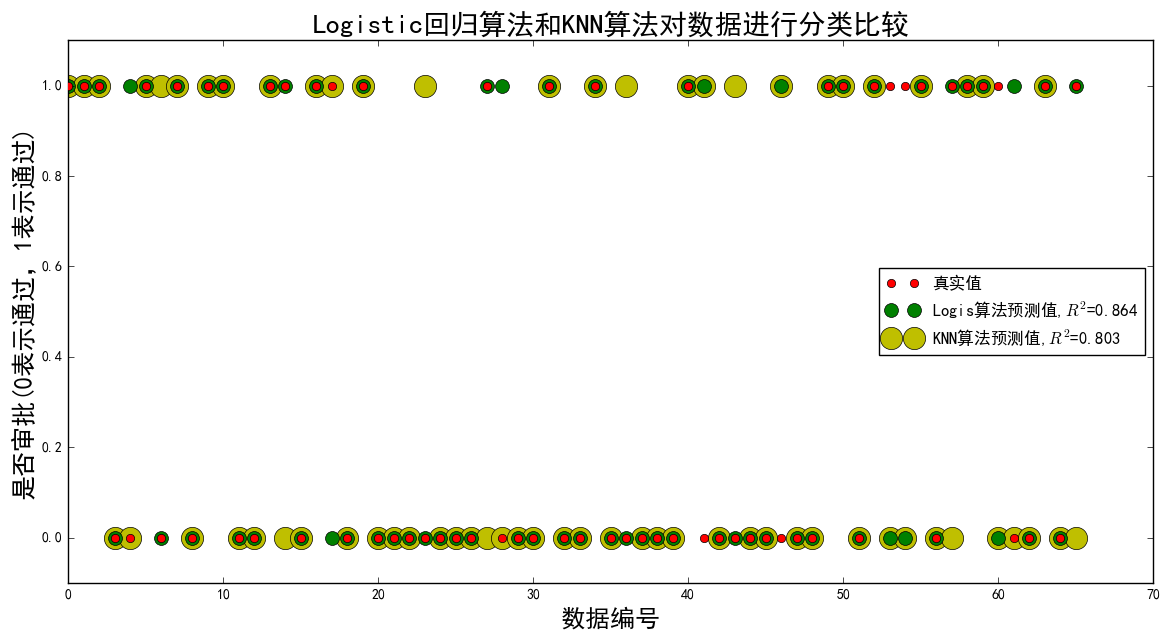

In [19]:

x_len = range(len(X_test))
plt.figure(figsize=(14,7), facecolor='w')
plt.ylim(-0.1,1.1)
plt.plot(x_len, Y_test, 'ro',markersize = 6, zorder=3, label=u'真实值')
plt.plot(x_len, lr_y_predict, 'go', markersize = 10, zorder=2, label=u'Logis算法预测值,$R^2$=%.3f' % lr.score(X_test, Y_test))
plt.plot(x_len, knn_y_predict, 'yo', markersize = 16, zorder=1, label=u'KNN算法预测值,$R^2$=%.3f' % knn.score(X_test, Y_test))
plt.legend(loc = 'center right')
plt.xlabel(u'数据编号', fontsize=18)
plt.ylabel(u'是否审批(0表示通过，1表示通过)', fontsize=18)
plt.title(u'Logistic回归算法和KNN算法对数据进行分类比较', fontsize=20)
plt.show()